In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("datasets/superstore_final_dataset.csv")
df1.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2786: invalid start byte

In [3]:
#here is an error while decoding the csv file. by default the encoding in python is done by 'utf-8'.
#HERE WE NEED TO DO ANOTHER encoding ON THE CSV FILE.

In [4]:
import chardet#to detect the correct encoding 
with open("datasets/superstore_final_dataset.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
df1=pd.read_csv("datasets/superstore_final_dataset.csv",encoding="ISO-8859-1")
df1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [6]:
df1.shape

(9800, 18)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
print(df1['Order_Date'].dtype)
print(df1['Ship_Date'].dtype)

object
object


In [9]:
df1['Order_Date']=pd.to_datetime(df1['Order_Date'],infer_datetime_format=True)
df1['Ship_Date']=pd.to_datetime(df1['Ship_Date'],infer_datetime_format=True)
df1[['Order_Date','Ship_Date']].head()

C:\Users\msrp\AppData\Local\Temp\ipykernel_21748\2926696568.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Order_Date']=pd.to_datetime(df1['Order_Date'],infer_datetime_format=True)
C:\Users\msrp\AppData\Local\Temp\ipykernel_21748\2926696568.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Ship_Date']=pd.to_datetime(df1['Ship_Date'],infer_datetime_format=True)


,Order_Date,Ship_Date
0,2017-08-11,2017-11-11
1,2017-08-11,2017-11-11
2,2017-12-06,2017-06-16
3,2016-11-10,2016-10-18
4,2016-11-10,2016-10-18


In [10]:
print(df1['Order_Date'].dtype)
print(df1['Ship_Date'].dtype)

datetime64[ns]
datetime64[ns]


In [11]:
import numpy as np
df1['Postal_Code']=df1['Postal_Code'].replace(np.NaN,'0')
df1['Postal_Code'].info()
df1['Postal_Code'].astype(float)

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Postal_Code
Non-Null Count  Dtype 
--------------  ----- 
9800 non-null   object
dtypes: object(1)
memory usage: 76.7+ KB


0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal_Code, Length: 9800, dtype: float64

In [12]:
df1=df1.reset_index(drop=True)
df1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [13]:
df1['Postal_Code'].value_counts()

10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: Postal_Code, Length: 627, dtype: int64

In [14]:
count1=df1['Ship_Mode'].value_counts()
count1

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship_Mode, dtype: int64

In [15]:
count=df1['Category'].value_counts()
count

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

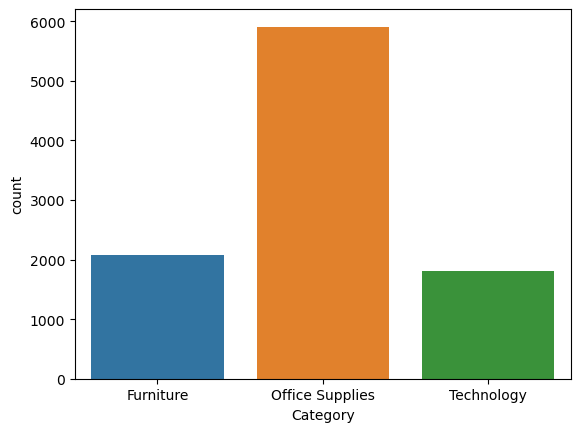

In [16]:
import seaborn as sns
sns.countplot(x=df1['Category'],data=df1)

<Axes: xlabel='Ship_Mode', ylabel='count'>

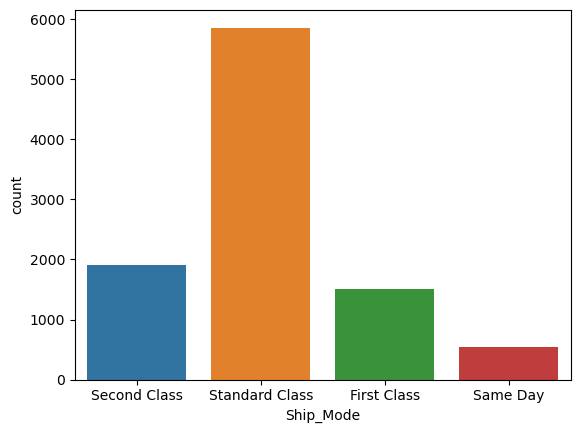

In [17]:
sns.countplot(x=df1["Ship_Mode"],data=df1)

In [24]:
total_sales=df1[['Category','Ship_Mode','Sales']]
t=total_sales.groupby(['Category','Ship_Mode'],as_index=False).sum()
t

,Category,Ship_Mode,Sales
0,Furniture,First Class,108739.0533
1,Furniture,Same Day,39124.5090
2,Furniture,Second Class,152657.8384
3,Furniture,Standard Class,428137.1750
4,Office Supplies,First Class,98227.4350
5,Office Supplies,Same Day,28770.6250
6,Office Supplies,Second Class,156054.4170
7,Office Supplies,Standard Class,422369.8570
8,Technology,First Class,138605.7690
9,Technology,Same Day,57323.9050


In [28]:
grouped_pivot=t.pivot(index='Category',columns='Ship_Mode')
grouped_pivot

Sales                                       
Ship_Mode        First Class   Same Day Second Class Standard Class
Category                                                           
Furniture        108739.0533  39124.509  152657.8384     428137.175
Office Supplies   98227.4350  28770.625  156054.4170     422369.857
Technology       138605.7690  57323.905  141201.9240     490324.275

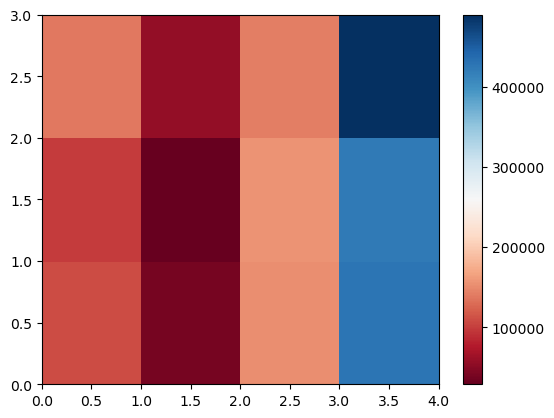

In [29]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

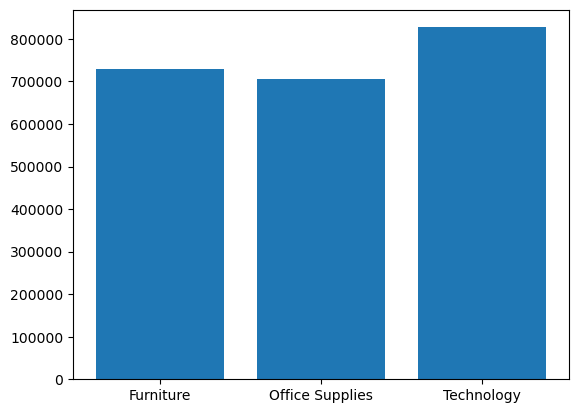

In [21]:
# sns.boxplot(x="Category",y='Sales',data=t)
plt.bar(t['Category'],t['Sales'])
plt.show()

In [22]:
df1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [32]:
df1['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)